## Concept

* Unsupervised algo that models normal examples in order to classify new ex as either normal or abnormal
* A one-class classifier aims at capturing characteristics of normal training instances, in order to be able to distinguish between them and potential outliers to appear.
* Before oneclass SVM - try standard SVM and weighted SVM
* Algo:
    * Unlike normal svm, this algo considers to maximize the margin split btw normal data against the origin
    * It creates a boundary such the distance btw origin and normal class are maximised
    * Train only on normal data
    
* Hyperparameters
    * $\nu$ contols sensitivity of support vectors (how many outliers to allow) ~ to contamination in isolation forest


F1 Score: 0.237


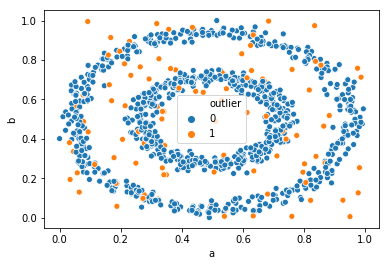

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'data\abn_data_1.csv')
df['outlier'] = df['outlier'].map({'no' : 0, 'yes' : 1})
sns.scatterplot(df['a'], df['b'], hue = df['outlier'])
X = df.drop('outlier', axis = 1)
y = df['outlier']

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# define outlier detection model
model = OneClassSVM(gamma=0.001, nu=0.01)

# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)

# detect outliers in the test set
yhat = model.predict(testX)

# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1

# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

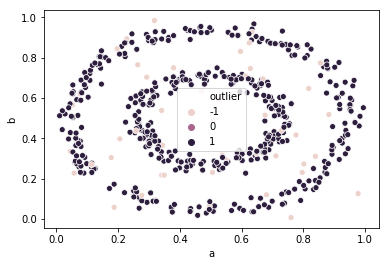

In [17]:
sns.scatterplot(testX['a'], testX['b'], hue = testy)